### DeepExplainer based model explaination for MLP

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import tensorflow as tf
from tensorflow.keras.models import load_model
shap.initjs()

In [46]:
mlp = load_model("./mlp_all_dfeatures_model8")

In [47]:
# load the data
data = pd.read_csv("./data_all_dfeatures.csv")

# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split
# get the predictors and target variable from dataset
X = data.drop('readmitted', axis=1)
y = data['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify=data['readmitted'])


In [48]:
# select a set of background examples to take an expectation over
background = X_train.iloc[np.random.choice(X_train.shape[0], 100, replace=False)]
#background.shape
# explain predictions of the model
#explainer = shap.DeepExplainer(mlp, background)

In [49]:
# select an instance 
print((background.shape))

(100, 130)


In [50]:
tf.__version__

'2.2.0'

In [51]:
shap.__version__

'0.35.0'

In [52]:
from tensorflow.compat.v1.keras.backend import get_session
tf.compat.v1.disable_v2_behavior()

In [53]:
shap.explainers.deep.deep_tf.op_handlers["AddV2"] = shap.explainers.deep.deep_tf.passthrough
#shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough
#shap.explainers.deep.deep_tf.op_handlers["shap_Neg"] = shap.explainers.deep.deep_tf.passthrough
explainer = shap.DeepExplainer(mlp,  background)

In [28]:
X_test.iloc[[4]]

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady
80613,1,45,1,-0.063588,0.648827,-0.464686,0.922641,-0.783548,0.249657,3.347875,...,1,0,0,1,0,0,0,0,0,0


In [55]:
# corresponding value of readmitted
y_test[80613]

0

In [29]:
# Calculate Shap values for 4th instance
choosen_instance = X_test.iloc[[4]]
shap_values = explainer.shap_values(choosen_instance.to_numpy(), check_additivity=False)


In [30]:
explainer.expected_value

array([0.0686492], dtype=float32)

In [31]:
shap.force_plot(explainer.expected_value, shap_values[0], choosen_instance)

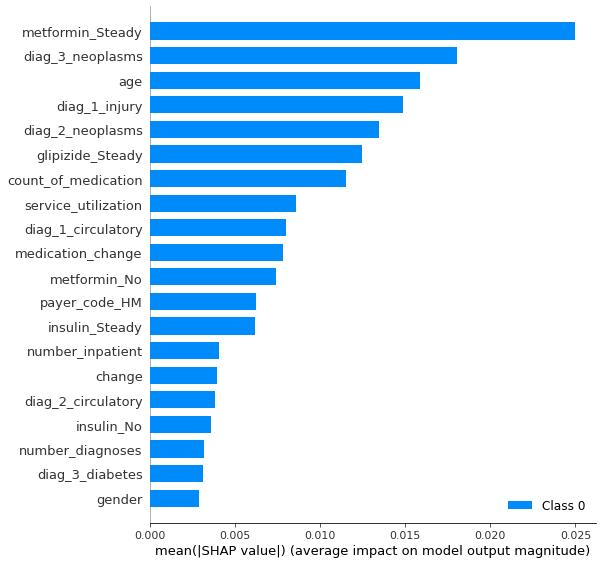

In [32]:
shap.summary_plot(shap_values, choosen_instance)


In [33]:
# Calculate Shap values for 421th instance
choosen_instance = X_test.iloc[[421]]
shap_values = explainer.shap_values(choosen_instance.to_numpy(), check_additivity=False)

In [34]:
explainer.expected_value

array([0.0686492], dtype=float32)

In [35]:
shap.force_plot(explainer.expected_value, shap_values[0], choosen_instance)

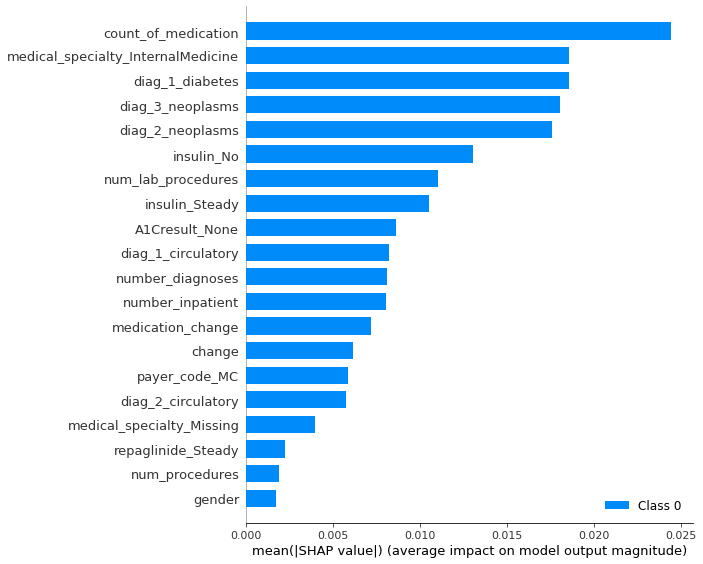

In [36]:
shap.summary_plot(shap_values, choosen_instance)

In [37]:
# Calculate Shap values for 5423th instance
choosen_instance = X_test.iloc[[5423]]
shap_values = explainer.shap_values(choosen_instance.to_numpy(), check_additivity=False)

In [38]:
explainer.expected_value

array([0.0686492], dtype=float32)

In [39]:
shap.force_plot(explainer.expected_value, shap_values[0], choosen_instance)

In [42]:
# Calculate Shap values for 19346 instance
choosen_instance = X_test.iloc[[19346]]
shap_values = explainer.shap_values(choosen_instance.to_numpy(), check_additivity=False)

In [44]:
explainer.expected_value

array([0.0686492], dtype=float32)

In [43]:
shap.force_plot(explainer.expected_value, shap_values[0], choosen_instance)

In [56]:
# Calculate Shap values for 5th instance
choosen_instance = X_test.iloc[[5]]
shap_values = explainer.shap_values(choosen_instance.to_numpy(), check_additivity=False)

In [57]:
explainer.expected_value

array([0.05713287], dtype=float32)

In [58]:
X_test.iloc[[5]]

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady
54633,1,85,3,-0.063588,-1.431088,-0.464686,-0.607207,0.978296,-0.244482,-0.40111,...,0,1,0,1,0,0,0,0,0,0


In [59]:
y_test[54633]

1

In [60]:
shap.force_plot(explainer.expected_value, shap_values[0], choosen_instance)

In [70]:
# plot the SHAP values for the of 50 instances
subset = X_train.iloc[0:50,:]

shap_values = explainer.shap_values(subset.to_numpy(), check_additivity=False)

shap.force_plot(explainer.expected_value, shap_values[0], X_train)

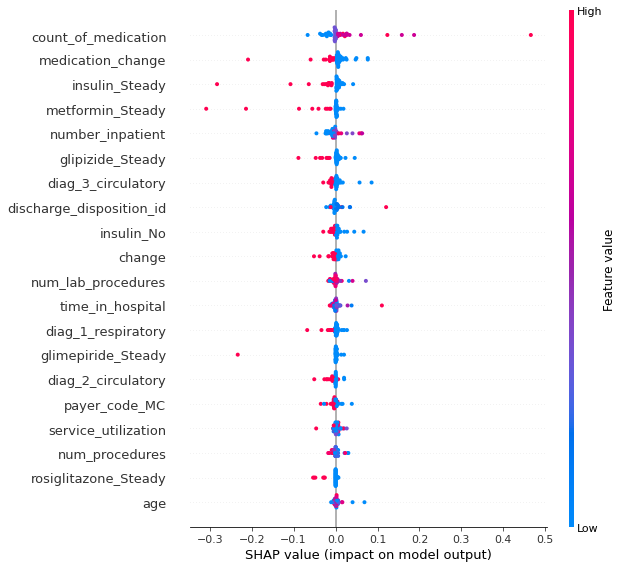

In [76]:
# plot the mean shap vlaues influencing globally
shap.initjs()
shap.summary_plot(shap_values[0], X_train.iloc[0:50,:])


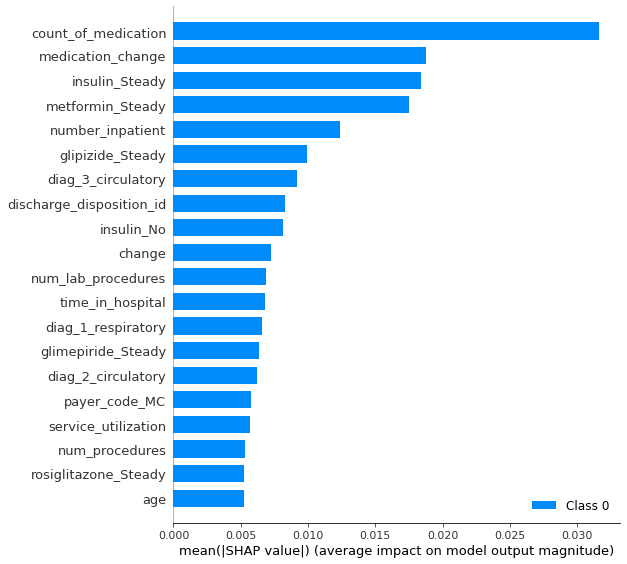

In [77]:
shap.summary_plot(shap_values, X_train.iloc[0:50,:])